<a href="https://colab.research.google.com/github/Luis-David-124/MetodosComputacionales810/blob/main/Students/Betancur_9784/Parciales/Copia_de_ParciaI_G1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parcial I - Métodos Computacionales

**2025-1**

---

Nombre:

Identificación:

---

* ⚠ Explique su código usando con comentarios,

* ❗Todas las funciones deben tener documentación básica,

* 🛑 El uso de IA's no está permitido,

* ⚛ La interpretación del enunciado hace parte de la evaluación,

* ⏲ Este parcial tiene una duración de 2 horas

In [2]:
# Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import factorial
from scipy.optimize import root_scalar, newton, bisect # Funciones para raices

## Ayudas
# np.sign (Signo de una variable)
# np.deg2rad (Convertir grados a radianes)
# pd.Dataframe Genera un dataframe a partir de un diccionario o listas
# df['Columna'] == valor (Crea un filtro para buscar el valor)
# range(0, 10, 2) (Pasos de 2 comenzando en 0 hasta 10)

# 1

**(40 puntos)** El **método de Steffensen** es un algoritmo iterativo para encontrar raíces de ecuaciones no lineales de la forma:

$$
f(x) = 0.
$$

Se basa en aplicar una **aceleración cuadrática** al método de punto fijo, sin necesidad de calcular derivadas, a diferencia del método de Newton.

---
### Pasos para implementar

1. **Definir la función** $f(x)$ cuya raíz se desea encontrar.

   - Se busca una raíz $\alpha$ tal que $f(\alpha) = 0$.

2. **Elegir una aproximación inicial** $x_0$ razonablemente cercana a la raíz.

3. **Aplicar la iteración de Steffensen**:

   Para cada iteración $n$, calcular:

   $$
   y_n = x_n + f(x_n)
   $$

   $$
   x_{n+1} = x_n - \frac{f(x_n)^2}{f(y_n) - f(x_n)}
   $$

   Asegurarse de que $f(y_n) \ne f(x_n)$ para evitar división por cero.

4. **Evaluar el criterio de convergencia**:

   - Repetir el paso 3 hasta que se cumpla
     - $|x_{n+1} - x_n| < \varepsilon$ (precisión sobre el valor de la raíz).

     donde $\varepsilon$ son tolerancias pequeñas definidas por el usuario.

5. **Resultado final**:

   - Cuando se cumple el criterio de convergencia, tomar $x_{n+1}$ como una aproximación a la raíz de $f(x) = 0$.

---


* Defina una función llamada `Steffensen` que calcule la raiz de una función dada. Su función debe tener documentación y retornar el valor de la raiz junto con el número de iteraciones empleadas para alcanzar la convergencia dada una tolerancia.

* Usando
$$\cos(x) = x^2,$$

Grafique la función para $0\leq x \leq \pi/2$ usando 100 puntos. Luego, cree un DataFrame llamado `df` con los datos de $x$ y $f(x)$  encuentre una primera aproximación a la raiz aplicando un filtro en el dataframe con los valores más cercanos a cero.

* Usando el método de Steffensen encuentre la raiz númericamente y compare su resultado usando el método de bisección y secante.

* Para las siguientes tolerancias (ver código) realice un gráfico usando escala logaritimica en $y$ de cuantas iteraciones son necesarias hasta alcanzar la convergencia. ¿Qué puede concluir acerca de la misma?

```python
# Tolerancias
tol = np.logspace(-1, -10, 10)

# Grafico semilog

plt.semilogy(N, tol)

```

In [118]:
from re import X
# Aquí va su código
def Steffensen(f, x, tol= 1e-7, maxIter= 1000):
  '''La funcion busca las raices de la funcion f, usando el metodo de Steffensen

    Entradas:

    f: La funcion ifualada a 0 para encontrar las raices
    x: La aproximacion inicial de la raiz
    tol: Tolerancia (Por defecto en 1e-7)
    maxIter: maximas iteraciones de la sucesion

    Salidas:

    Xn1: La aproximacion a la raiz
    n: Las interaciones usadas

  '''

  #Se define Xn
  Xn = x

  #Lista de iteraciones
  N = []

  #Desarrollo del metodo
  for n in range(maxIter+1):

    Yn = Xn + f(Xn)

    #En caso de que f(Yn) = f(Xn), el metodo deja de funcionar porque habra una divicion por 0
    if f(Yn) == f(Xn):
      raise RuntimeError('Division por cero, f(Yn) tiene que ser distinto de f(Xn)')

    Xn1 = Xn - (f(Xn)**2 / (f(Yn) - f(Xn)))

    if abs(Xn1 - Xn) < tol:
      return Xn1, n

    Xn = Xn1

  raise RuntimeError('Maximo de iteraciones alcanzado')

Los puntos de la funcion son

           X      f(x)
0   0.000000  1.000000
1   0.015867  0.999622
2   0.031733  0.998490
3   0.047600  0.996602
4   0.063467  0.993959
..       ...       ...
95  1.507330 -2.208619
96  1.523196 -2.272545
97  1.539063 -2.336987
98  1.554930 -2.401940
99  1.570796 -2.467401

[100 rows x 2 columns]

La raiz calculada con el valor minomo de f(x) en la lista es:

           X      f(x)
52  0.825065 -0.002222


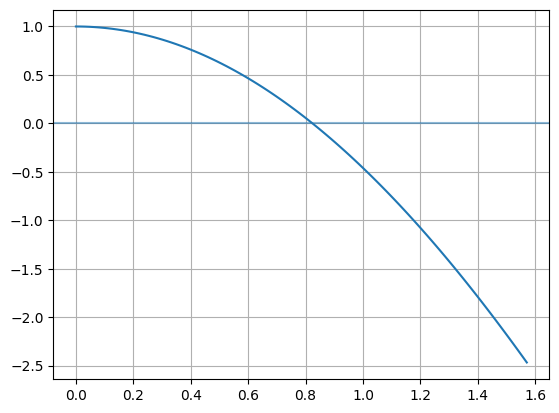

In [178]:
#Se define la funcion
f = lambda X: np.cos(X) - X**2

#Se evaluan los f(x) en el rando dado (0, pi/2)
x = np.linspace(0, np.pi/2, 100)
y = f(x)

plt.axhline(0, alpha= 0.5)

plt.plot(x, y)

plt.grid()

#Se crea el dataframe
dicc = {'X' : x, 'f(x)' : y}

df = pd.DataFrame(dicc)

raizTanteo = df[abs(df['f(x)']) <= min(abs(df['f(x)']))]

print(f'Los puntos de la funcion son\n\n{df}\n\nLa raiz calculada con el valor minomo de f(x) en la lista es:\n\n{raizTanteo}')

In [128]:
raiz, _= Steffensen(f, 0.8)
raizBisec = bisect(f, 1, 0.8)
raizSec = newton(f, 0.8)

print(f'La raiz usando el metodo de Steffensen fue: {raiz}\nCon el metodo de la bisecante: {raizBisec}\nCon el metodo de la secante: {raizSec}')

La raiz usando el metodo de Steffensen fue: 0.8241323123025224
Con el metodo de la bisecante: 0.824132312303118
Con el metodo de la secante: 0.8241323123025247


[1, 2, 2, 3, 3, 3, 4, 4, 4, 4]


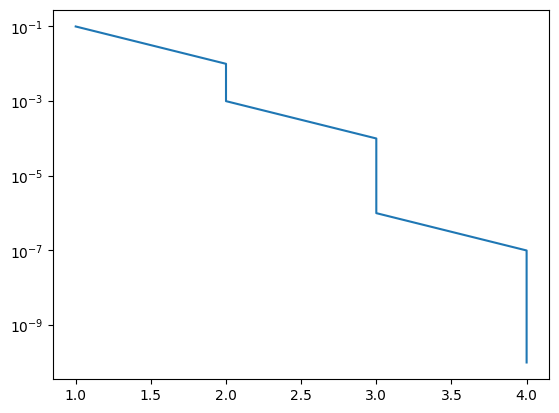

In [131]:
# Tolerancias
tol = np.logspace(-1, -10, 10)

N = []

for t in tol:
  _, n = Steffensen(f, 1, t)

  N.append(n)


# Grafico semilog
plt.semilogy(N, tol)

#2

**(60 puntos)** El periodo de oscilación $T$ de un péndulo simple con amplitud angular $\theta_0$ está dado por la integral elíptica:

$$T = 4\sqrt{\frac{L}{g}}\int_0^{\theta_0/2} \frac{d\theta}{\sqrt{\cos\theta - \cos\theta_0}}$$

Esta expresión puede representarse mediante la siguiente serie infinita:

$$T = 2\pi\sqrt{\frac{L}{g}}\left[1 + \sum_{n=1}^{\infty}c_n\sin^{2n}\left(\frac{\theta_0}{2}\right)\right]$$

donde los coeficientes $c_n$ están dados por:

$$c_n = \left(\frac{(2n-1)!!}{2^n n!}\right)^2$$

El doble factorial $(2n-1)!!$ significa el producto de todos los números impares desde 1 hasta $(2n-1)$.

Los primeros términos de esta serie son:

$$T \approx 2\pi\sqrt{\frac{L}{g}}\left[1 + \frac{1}{4}\sin^2\left(\frac{\theta_0}{2}\right) + \frac{9}{64}\sin^4\left(\frac{\theta_0}{2}\right) + \frac{25}{256}\sin^6\left(\frac{\theta_0}{2}\right) + \frac{1225}{16384}\sin^8\left(\frac{\theta_0}{2}\right) + \ldots\right]$$

Para un péndulo de longitud $L = 1.2$ metros:

## Parte A

* Realice una función llamada `doble_factorial` que calcule $(2n - 1)!!$ y luego una llamada `coeficiente_cn` que devuelva el coeficiente $c_n$

* Para una amplitud de $\theta_0 = 90°$ y $\theta_0 = 15°$, determine el valor de $T$ utilizando:
  - La aproximación de pequeñas oscilaciones $T_0 = 2\pi\sqrt{L/g}$
  - La serie truncada a 3 términos.
  - ¿Cuál será el error de las aproximaciones anteriores si toma 10 terminos como el valor exacto? ¿Cómo influye el valor del ángulo usado?

## Parte B

* Encuentre una función $f(\theta_0)$ para  $\theta_0$ (en radianes) en la cual el periodo real es exactamente un 10% mayor que el periodo para oscilaciones infinitesimales ($T_0 = 2\pi\sqrt{L/g}$). Utilice para $T(\theta_0)$ los primeros 4 términos de la serie y grafique esta función para $\theta_0 \in [0, \pi/2]$.

* Resuelva numéricamente la ecuación para $f(\theta_0) = 0$ utilizando el método de Bisección y Newton-Raphson (sin incluir la derivada).





In [167]:
# Aqui va su código

def doble_factorial(x):
  '''Doble factorial'''
  if x == 0:
    return 1
  else:
    resultado=1
    for i in range(1, x+1,2):
      resultado*=i
    return(resultado)

doble_factorial(3)

def coeficiente_cn(n):
  '''Suncion coeficiente

  Entrada:
  n: posicion del termino

  Salidas:
  Cn: Coeficiente
  '''
  Cn = (doble_factorial(n)/(2**n * factorial(n)))**2
  return Cn

def T(theta, L= 1.2, tol= 1e-7, maxIter= 1000):
  T= 2*np.pi*(L/9.8)**2

  suma = 1
  terminoAnt = 1
  for n in range(1, maxIter):

    termino = coeficiente_cn(n)*np.sin(theta/2**(2*n))

    suma += termino
    terminoAnt = termino

  return suma



In [169]:

T1 = np.pi/2

print(f'Con 90°, truncado en 3 terminos, la sucesion es: {T(T1, maxIter=3)}')


Con 90°, truncado en 3 terminos, la sucesion es: 1.0972023759089218
